限制模型捕捉总体规律的原因主要有两点：
- 样本数据能否很好的反映总体规律
- 样本数据能反映总体规律，但模型没有捕捉到
    - 模型欠拟合 训练集上误差较大
    - 模型过拟合 训练集上误差较小，测试集上误差较大

In [1]:
import numpy as np

In [2]:
np.random.seed(123)

# 创建数据
n_dots = 20
x = np.linspace(0,1,n_dots) # 从0到1，等宽排布的20个数
y = np.sqrt(x) + 0.2 * np.random.rand(n_dots) - 0.1

In [3]:
x,y

(array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 array([0.03929384, 0.1866436 , 0.26981313, 0.40762266, 0.50272526,
        0.49761047, 0.65810433, 0.64394293, 0.64507206, 0.66667071,
        0.69411185, 0.80669585, 0.78243386, 0.73910577, 0.83800393,
        0.9361224 , 0.85416128, 0.88099565, 0.9796388 , 1.00636552]))

In [4]:
np.random.rand(10)

array([0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
       0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612])

In [5]:
# polyfit多项式函数拟合 得到多项式各阶系数
y0 = x ** 2
np.polyfit(x,y0,2)

array([1.00000000e+00, 4.76278295e-17, 3.07956068e-17])

In [6]:
# 根据系数使用poly1d函数逆向构造多项式方程
p = np.poly1d(np.polyfit(x,y0,2))
print(p)

   2
1 x + 4.763e-17 x + 3.08e-17


In [7]:
p(-1)

1.0000000000000002

In [8]:
import matplotlib
import matplotlib.pyplot as plt

def plot_polynomial_fit(x,y,deg):
    """
    红色点：数据
    蓝色线：拟合结果
    红色线：真实规律
    """
    p = np.poly1d(np.polyfit(x,y,deg))
    t = np.linspace(0,1,200)
    plt.plot(x,y,'ro',t,p(t),'-',t,np.sqrt(t),'r--')

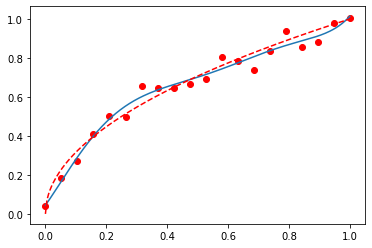

In [9]:
plot_polynomial_fit(x,y,6)

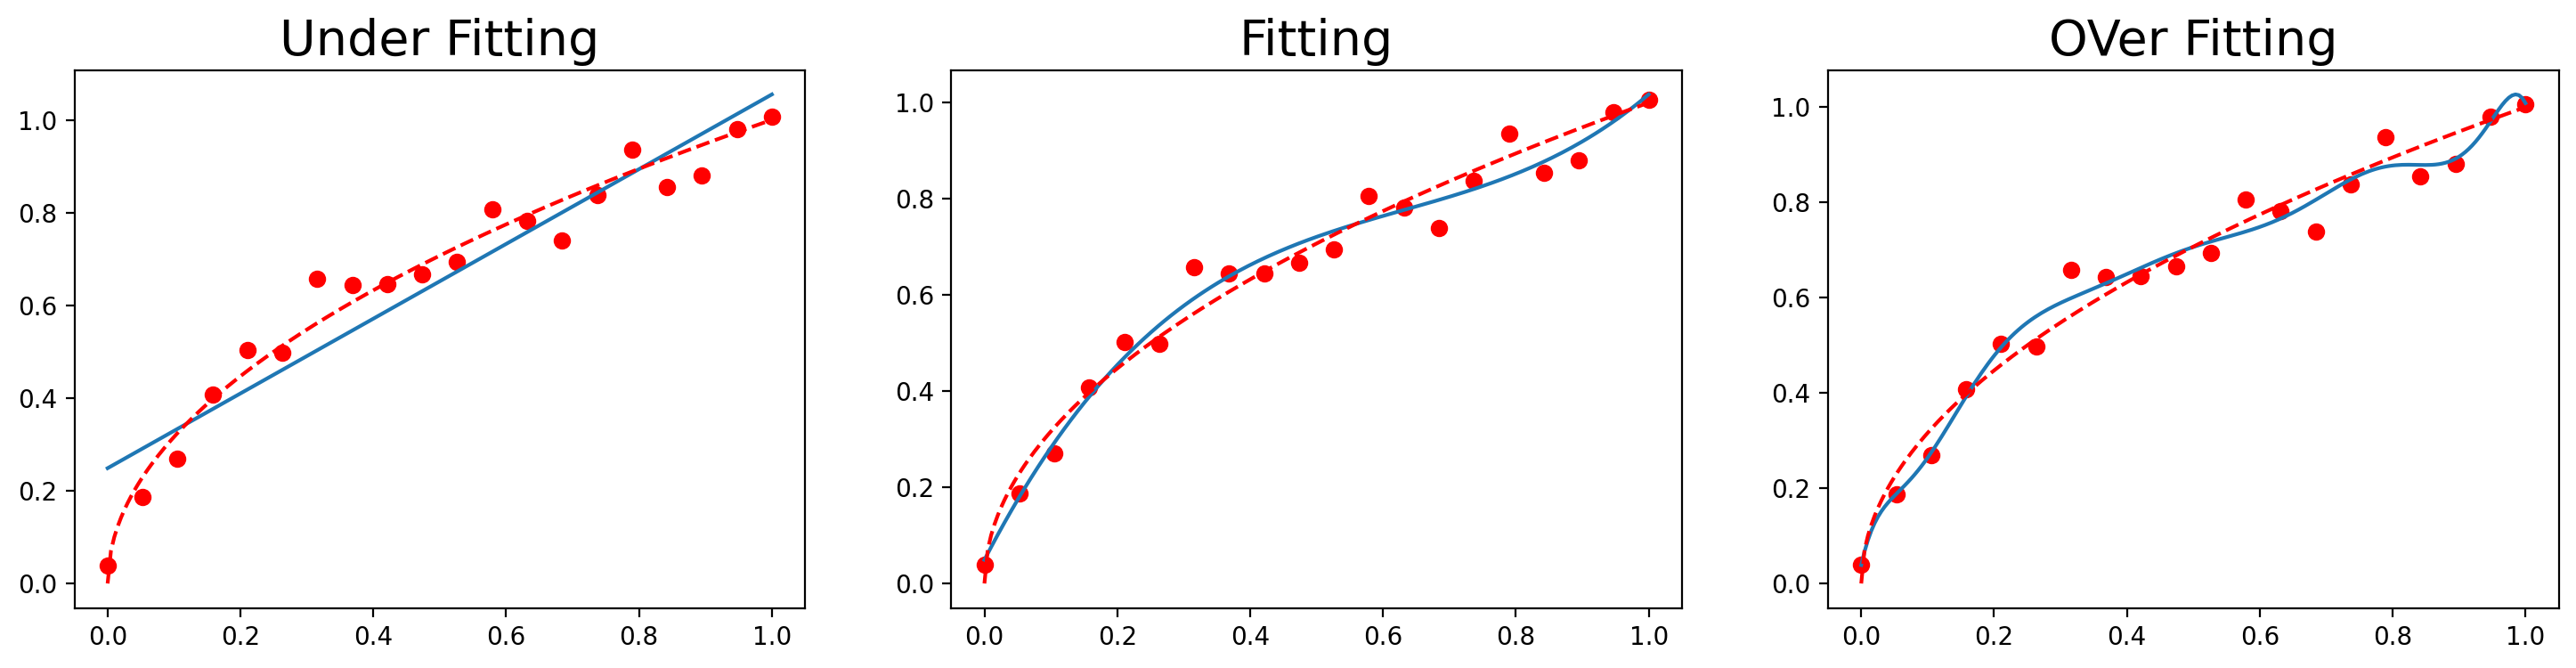

In [10]:
plt.figure(figsize=(18,4),dpi=200)
titles = ['Under Fitting','Fitting','OVer Fitting']
for index,deg in enumerate([1,3,10]):
    plt.subplot(1,3,index+1)
    plot_polynomial_fit(x,y,deg)
    plt.title(titles[index],fontsize=20)

In [11]:
# 导入相关的包

# 随机模块
import random

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# numpy
import numpy as np

# pytorch
import torch
from torch import nn,optim
from torch.nn import MSELoss # class
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset,DataLoader
from torch.utils.tensorboard import SummaryWriter

# 导入自定义模块
from torchLearning import *

# 导入以下包从而使得可以在 jupyter 中的 cell 输出多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 模型欠拟合实例

- 构建数据集

$ y = 2x1^2-x2^2 $

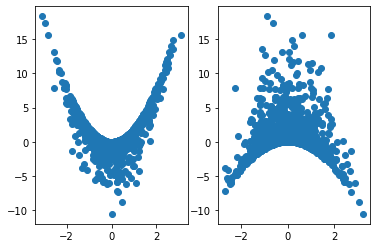

In [12]:
torch.manual_seed(420)

# 创建最高项为2的多项式回归数据集
features,labels = tensorGenReg(w = [2,-1],bias=False,deg=2)

# 绘制图像查看数据分布
plt.subplot(121)
plt.scatter(features[:,0],labels)
plt.subplot(122)
plt.scatter(features[:,1],labels)

In [13]:
features,labels

(tensor([[-0.0070,  0.5044],
         [ 0.6704, -0.3829],
         [ 0.0302,  0.3826],
         ...,
         [-0.9164, -0.6087],
         [ 0.7815,  1.2865],
         [ 1.4819,  1.1390]]),
 tensor([[-2.6234e-01],
         [ 7.5711e-01],
         [-1.4600e-01],
         [ 4.8415e-03],
         [ 6.3458e+00],
         [ 1.3923e+01],
         [ 1.5233e+00],
         [ 6.3081e+00],
         [ 1.2336e-01],
         [-3.4880e-01],
         [-4.1877e+00],
         [ 1.8243e+00],
         [ 1.5435e+00],
         [ 1.0257e+00],
         [ 3.1846e+00],
         [ 9.1467e-01],
         [ 5.1700e+00],
         [-8.3896e-01],
         [ 2.2152e-01],
         [-1.1261e-01],
         [ 1.1729e+00],
         [ 1.3097e-01],
         [-7.9972e-01],
         [-2.0830e+00],
         [ 1.1510e+00],
         [ 5.8148e+00],
         [ 4.4661e-01],
         [-3.2131e-02],
         [-1.6475e+00],
         [ 2.2285e-01],
         [ 1.7937e-01],
         [-5.3282e+00],
         [-4.1450e-01],
         [ 2.5489e

In [14]:
# 进行数据切分和加载
train_loader,test_loader = split_loader(features,labels)

- 训练模型

In [15]:
# 定义简单线性回归模型
class LR_class(nn.Module):
    def __init__(self,in_features=2,out_features=1):
        super(LR_class,self).__init__()
        self.linear = nn.Linear(in_features,out_features)
        
    def forward(self,x):
        out = self.linear(x)
        
        return out

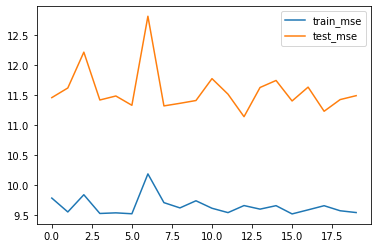

In [16]:
torch.manual_seed(420)

# 实例化模型
LR = LR_class()

train_l = []
test_l = []

num_epochs = 20

for epochs in range(num_epochs):
    fit(net = LR,
       criterion = nn.MSELoss(),
       optimizer = optim.SGD(LR.parameters(),lr = 0.03),
       batchData = train_loader,
       epochs = epochs)
    train_l.append(mse_cal(train_loader,LR).detach().numpy())
    test_l.append(mse_cal(test_loader,LR).detach().numpy())
    
# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l,label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc=1) # 1234图例放在4个角

In [17]:
def model_train_test(model,train_data,test_data,num_epochs=20,criterion=nn.MSELoss(),optimizer=optim.SGD,lr=0.03,cla=False,eva=mse_cal):
    """模型误差测试函数
    
    param model: 模型
    param train_data: 训练数据
    param test_data: 测试数据
    param num_epochs: 迭代次数
    param criterion: 损失函数
    param optimizer: 优化方法
    param lr: 学习率
    param cla: 是否是分类模型
    return :MSE列表
    
    """
    
    # 模型评估指标列表
    train_l = []
    test_l = []
    # 模型训练过程
    for epochs in range(num_epochs):
        fit(net = model,
            criterion = criterion,
            optimizer = optimizer(model.parameters(),lr=lr),
            batchData = train_data,
            epochs = epochs,
            cla = cla
        )
        train_l.append(eva(train_data, model).detach())
        test_l.append(eva(test_data, model).detach())
        
    return train_l, test_l

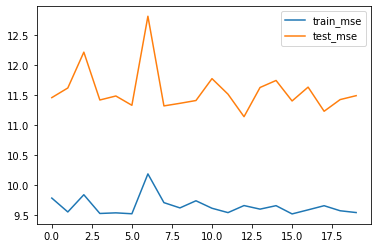

In [18]:
torch.manual_seed(420)

# 实例化模型
LR = LR_class()

# 模型训练
train_l,test_l = model_train_test(LR,train_loader,test_loader,num_epochs=20,criterion=nn.MSELoss(),optimizer=optim.SGD,lr=0.03,cla=False,eva=mse_cal)

# 绘制图像，查看MSE变化情况

plt.plot(list(range(num_epochs)), train_l,label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc=1) # 1234图例放在4个角

In [19]:
class LR_class1(nn.Module):
    def __init__(self,in_features=2,n_hidden=4,out_features=1):
        super(LR_class1,self).__init__()
        self.linear1 = nn.Linear(in_features,n_hidden)
        self.linear2 = nn.Linear(n_hidden,out_features)
        
    def forward(self,x):
        # 未加入激活函数
        z1 = self.linear1(x)
        out = self.linear2(z1)
        
        return out

In [20]:
torch.manual_seed(420)

# 实例化模型
LR1 = LR_class1()

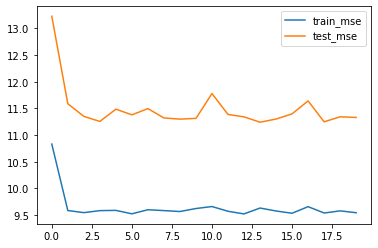

In [21]:
# 模型训练
train_l,test_l = model_train_test(LR1,train_loader,test_loader,num_epochs=20,criterion=nn.MSELoss(),optimizer=optim.SGD,lr=0.03,cla=False,eva=mse_cal)

# 绘制图像，查看MSE变化情况

plt.plot(list(range(num_epochs)), train_l,label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc=1) # 1234图例放在4个角

In [22]:
# 模型增加线性层，结果没有显著提升，但模型稳定性却有所提升（局部规律，模型越复杂，输出结果不一定平稳）
# 对于叠加线性层的神经网络模型来说，由于模型只是对数据仿射变换，因此并不能满足拟合高次项的目的。
# 在增加模型复杂度的过程中，首先需要激活函数的配合，然后再是增加模型的层数和每层的神经元个数

## 激活函数性能比较

- 隐藏层的激活函数是为了对数据进行非线性变换
- 输出层的激活函数一般都是为了满足某种特定的输出结果所设计的，如softmax、sigmoid等
- 激活函数一般添加在隐藏层,如果在回归类问题的输出层加入激活函数反而会影响输出结果
- 可以使用 `F.方法` 或者 `torch.方法` 加入激活函数，优先使用torch.方法，因为很多F.方法在新版本Pytorch中移除

In [23]:
# Sigmoid 激活函数
class Sigmoid_class1(nn.Module):
    def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
        super(Sigmoid_class1,self).__init__()
        self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
        self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)
        
    def forward(self,x):
        
        z1 = self.linear1(x)
        # 隐藏层加入激活函数 sigmoid
        p1 = torch.sigmoid(z1)
        
        out = self.linear2(p1)
        
        return out
    
# Relu 激活函数
class ReLU_class1(nn.Module):
    def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
        super(ReLU_class1,self).__init__()
        self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
        self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)
        
    def forward(self,x):
        
        z1 = self.linear1(x)
        # 隐藏层加入激活函数 relu
        p1 = torch.relu(z1)
        
        out = self.linear2(p1)
        
        return out
    
# tanh 激活函数
class Tanh_class1(nn.Module):
    def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
        super(Tanh_class1,self).__init__()
        self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
        self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)
        
    def forward(self,x):
        
        z1 = self.linear1(x)
        # 隐藏层加入激活函数 tanh
        p1 = torch.tanh(z1)
        
        out = self.linear2(p1)
        
        return out

In [24]:
t = torch.randn(5)
t

tensor([ 1.0870, -0.5685,  1.3383, -1.1286,  0.7049])

In [25]:
F.relu(t),torch.relu(t)

(tensor([1.0870, 0.0000, 1.3383, 0.0000, 0.7049]),
 tensor([1.0870, 0.0000, 1.3383, 0.0000, 0.7049]))

In [26]:
F.sigmoid(t)

/Users/feishuoren/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.7478, 0.3616, 0.7922, 0.2444, 0.6693])

In [27]:
# 实例化模型
torch.manual_seed(420)

LR1 = LR_class1()
sigmoid_model1 = Sigmoid_class1()
tanh_model1 = Tanh_class1()
relu_model1 = ReLU_class1()

model_1 = [LR1,sigmoid_model1,tanh_model1,relu_model1] # 将实例化后模型放在一个列表容器中
name_1 = ['LR1','sigmoid_model1','tanh_model1','relu_model1']

In [28]:
# 定义核心参数
num_epochs = 20
lr = 0.03

In [29]:
# 定义训练集、测试集MSE存储张量
mse_train = torch.zeros(len(model_1),num_epochs)
mse_test = torch.zeros(len(model_1),num_epochs)

In [30]:
# 训练模型
for epochs in range(num_epochs):
    for i,model in enumerate(model_1):
        fit(net=model,
           criterion=nn.MSELoss(),
           optimizer=optim.SGD(model.parameters(),lr=lr),
           batchData = train_loader,
           epochs = epochs)
        mse_train[i][epochs] = mse_cal(train_loader, model).detach()
        mse_test[i][epochs] = mse_cal(test_loader, model).detach()

In [31]:
mse_train,mse_test

(tensor([[10.8300,  9.6183,  9.5377,  9.5424,  9.5281,  9.5424,  9.5307,  9.6709,
           9.6506,  9.5715,  9.5667,  9.5676,  9.5256,  9.6038,  9.5861,  9.5923,
           9.5561,  9.5361,  9.5341,  9.6532],
         [10.7485,  9.6312,  9.1988,  7.2129,  4.2056,  3.0935,  2.7215,  2.5760,
           2.4808,  2.4366,  2.4117,  2.3941,  2.6143,  2.3471,  2.3591,  2.3268,
           2.3721,  2.3679,  2.3446,  2.4497],
         [10.7273,  9.1379,  4.2118,  2.9888,  1.1447,  0.4009,  0.3438,  0.9930,
           0.2856,  0.4441,  0.6101,  0.3811,  0.4463,  1.1677,  0.3492,  0.2975,
           0.4218,  0.4350,  0.8227,  0.2279],
         [10.2269,  1.5575,  0.8269,  0.5590,  0.3459,  0.2524,  0.2389,  0.2642,
           0.2550,  0.2456,  0.2591,  0.2313,  0.2390,  0.2437,  0.2378,  0.2483,
           0.2699,  0.2814,  0.2544,  0.2343]]),
 tensor([[13.2264, 11.0956, 11.3072, 11.3635, 11.4187, 11.2845, 11.3530, 11.6225,
          11.2006, 11.2688, 11.3045, 11.2897, 11.3566, 11.2394, 11.5191,

In [32]:
# 绘制图形观察结果

Text(0.5, 1.0, 'mse_train')

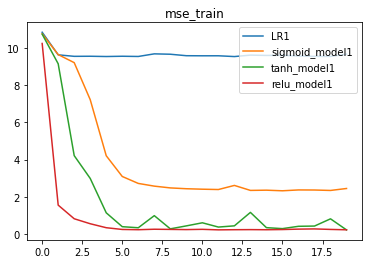

In [33]:
# 训练误差
for i,name in enumerate(name_1):
    plt.plot(list(range(num_epochs)), mse_train[i],label=name)
plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

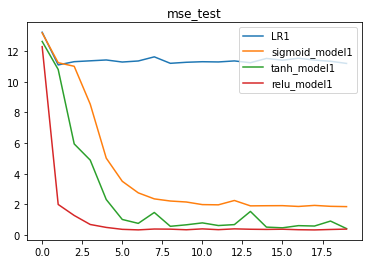

In [34]:
# 测试误差
for i,name in enumerate(name_1):
    plt.plot(list(range(num_epochs)), mse_test[i],label=name)
plt.legend(loc=1)
plt.title('mse_test')

In [35]:
# relu激活函数目前应用广泛效果最好
# rnn中仍旧使用tanh和sigmoid

In [36]:
def model_comparison(model_l,name_l,train_data,test_data,num_epochs=20,criterion=nn.MSELoss(),optimizer=optim.SGD,lr=0.03,cla=False,eva=mse_cal):
    """模型对比函数
    
    param model_l: 模型序列
    param name_l: 模型名称序列
    param train_data: 训练数据
    param test_data: 测试数据
    param num_epochs: 迭代次数
    param criterion: 损失函数
    param lr: 学习率
    param cla: 是否是分类模型
    return :MSE张量矩阵
    
    """
    
    # 模型评估指标矩阵
    train_l = torch.zeros(len(model_l),num_epochs)
    test_l = torch.zeros(len(model_l),num_epochs)
    
    # 模型训练过程
    for epochs in range(num_epochs):
        for i,model in enumerate(model_l):
            fit(net=model,
               criterion=criterion,
               optimizer=optimizer(model.parameters(),lr=lr),
               batchData = train_data,
               epochs = epochs,
               cla=cla)
            train_l[i][epochs] = eva(train_data, model).detach()
            test_l[i][epochs] = eva(test_data, model).detach()
            
    return train_l,test_l

## 构建复杂神经网络

In [37]:
class ReLU_class2(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,out_features=1,bias=True):
        super(ReLU_class2,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = torch.relu(self.linear2(sigma1))
        out = self.linear3(sigma2)
        
        return out

In [38]:
# 模型性能测试
torch.manual_seed(420)

# 实例化模型
relu_model1 = ReLU_class1()
relu_model2 = ReLU_class2()

# 模型列表容器
model_l = [relu_model1,relu_model2]
name_l = ['relu_model1','relu_model2']

# 核心参数
num_epochs = 20
lr = 0.03

In [39]:
train_l,test_l = model_comparison(model_l = model_l,
                                  name_l = name_l,
                                  train_data = train_loader,
                                  test_data = test_loader,
                                  num_epochs = num_epochs,
                                  criterion = nn.MSELoss(),
                                  optimizer = optim.SGD,
                                  lr = 0.03,
                                  cla = False,
                                  eva = mse_cal
)

Text(0.5, 1.0, 'mse_train')

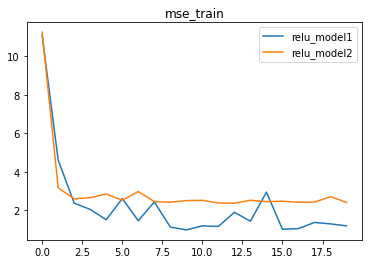

In [40]:
# 训练误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

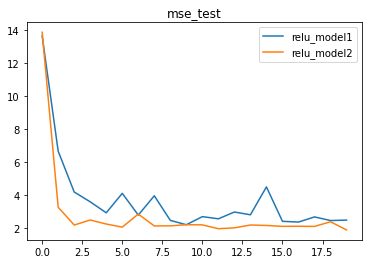

In [41]:
# 测试误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_test')

### ReLU 激活函数叠加

In [118]:
class ReLU_class3(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,hidden_3=4,out_features=1,bias=True):
        super(ReLU_class3,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,hidden_3,bias=bias)
        self.linear4 = nn.Linear(hidden_3,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = torch.relu(self.linear2(sigma1))
        sigma3 = torch.relu(self.linear3(sigma2))
        out = self.linear4(sigma3)
        
        return out

class ReLU_class4(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,hidden_3=4,hidden_4=4,out_features=1,bias=True):
        super(ReLU_class4,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,hidden_3,bias=bias)
        self.linear4 = nn.Linear(hidden_3,hidden_4,bias=bias)
        self.linear5 = nn.Linear(hidden_4,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.relu(self.linear1(x))
        sigma2 = torch.relu(self.linear2(sigma1))
        sigma3 = torch.relu(self.linear3(sigma2))
        sigma4 = torch.relu(self.linear4(sigma3))
        out = self.linear5(sigma4)
        
        return out

In [122]:
# 模型性能测试
torch.manual_seed(24)

# 实例化模型
relu_model1 = ReLU_class1()
relu_model2 = ReLU_class2()
relu_model3 = ReLU_class3()
relu_model4 = ReLU_class4()

# 模型列表容器
model_l = [relu_model1,relu_model2,relu_model3,relu_model4]
name_l = ['relu_model1','relu_model2','relu_model3','relu_model4']

# 核心参数
num_epochs = 50
lr = 0.03

train_l,test_l = model_comparison(model_l = model_l,
                                  name_l = name_l,
                                  train_data = train_loader,
                                  test_data = test_loader,
                                  num_epochs = num_epochs,
                                  criterion = nn.MSELoss(),
                                  optimizer = optim.SGD,
                                  lr = 0.03,
                                  cla = False,
                                  eva = mse_cal
)

Text(0.5, 1.0, 'mse_train')

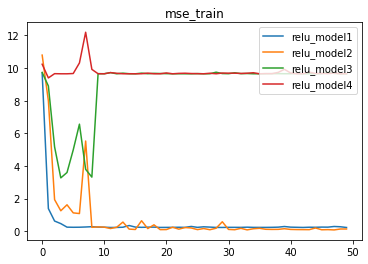

In [123]:
# 训练误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

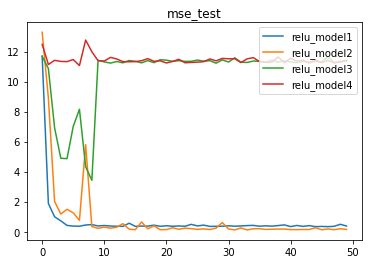

In [124]:
# 测试误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_test')

- relu函数爹架构出现模型失效问题（神经元坏死）,Dead ReLU Problem

### Sigmoid 激活函数叠加

In [46]:
class Sigmoid_class2(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,out_features=1,bias=True):
        super(Sigmoid_class2,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.sigmoid(self.linear1(x))
        sigma2 = torch.sigmoid(self.linear2(sigma1))
        out = self.linear3(sigma2)
        
        return out
    
class Sigmoid_class3(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,hidden_3=4,out_features=1,bias=True):
        super(Sigmoid_class3,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,hidden_3,bias=bias)
        self.linear4 = nn.Linear(hidden_3,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.sigmoid(self.linear1(x))
        sigma2 = torch.sigmoid(self.linear2(sigma1))
        sigma3 = torch.sigmoid(self.linear3(sigma2))
        out = self.linear4(sigma3)
        
        return out

class Sigmoid_class4(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,hidden_3=4,hidden_4=4,out_features=1,bias=True):
        super(Sigmoid_class4,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,hidden_3,bias=bias)
        self.linear4 = nn.Linear(hidden_3,hidden_4,bias=bias)
        self.linear5 = nn.Linear(hidden_4,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.sigmoid(self.linear1(x))
        sigma2 = torch.sigmoid(self.linear2(sigma1))
        sigma3 = torch.sigmoid(self.linear3(sigma2))
        sigma4 = torch.sigmoid(self.linear4(sigma3))
        out = self.linear5(sigma4)
        
        return out

In [47]:
# 模型性能测试
torch.manual_seed(420)

# 实例化模型
sigmoid_model1 = Sigmoid_class1()
sigmoid_model2 = Sigmoid_class2()
sigmoid_model3 = Sigmoid_class3()
sigmoid_model4 = Sigmoid_class4()

# 模型列表容器
model_l = [sigmoid_model1,sigmoid_model2,sigmoid_model3,sigmoid_model4]
name_l = ['sigmoid_model1','sigmoid_model2','sigmoid_model3','sigmoid_model4']

# 核心参数
num_epochs = 50
lr = 0.03

train_l,test_l = model_comparison(model_l = model_l,
                                  name_l = name_l,
                                  train_data = train_loader,
                                  test_data = test_loader,
                                  num_epochs = num_epochs,
                                  criterion = nn.MSELoss(),
                                  optimizer = optim.SGD,
                                  lr = 0.03,
                                  cla = False,
                                  eva = mse_cal
)

Text(0.5, 1.0, 'mse_train')

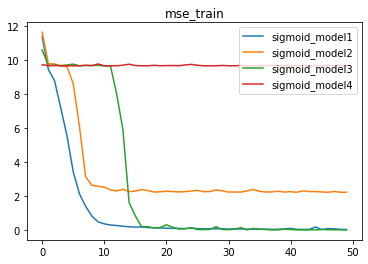

In [48]:
# 训练误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

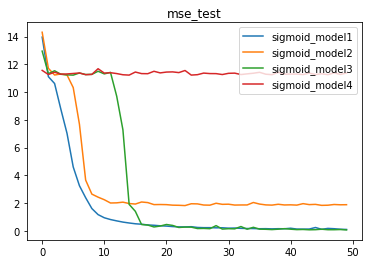

In [49]:
# 测试误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_test')

- sigmoid叠加后，伴随模型复杂度的增加，收敛速度下降严重（由于梯度消失导致）
- 相比较ReLU激活函数，整体收敛过程稍显稳定
- sigmoid是2000年以前最主流的家伙函数

### Tanh 激活函数叠加

In [50]:
class Tanh_class2(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,out_features=1,bias=True):
        super(Tanh_class2,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.tanh(self.linear1(x))
        sigma2 = torch.tanh(self.linear2(sigma1))
        out = self.linear3(sigma2)
        
        return out
    
class Tanh_class3(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,hidden_3=4,out_features=1,bias=True):
        super(Tanh_class3,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,hidden_3,bias=bias)
        self.linear4 = nn.Linear(hidden_3,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.tanh(self.linear1(x))
        sigma2 = torch.tanh(self.linear2(sigma1))
        sigma3 = torch.tanh(self.linear3(sigma2))
        out = self.linear4(sigma3)
        
        return out

class Tanh_class4(nn.Module):
    def __init__(self,in_features=2,hidden_1=4,hidden_2=4,hidden_3=4,hidden_4=4,out_features=1,bias=True):
        super(Tanh_class4,self).__init__()
        self.linear1 = nn.Linear(in_features,hidden_1,bias=bias)
        self.linear2 = nn.Linear(hidden_1,hidden_2,bias=bias)
        self.linear3 = nn.Linear(hidden_2,hidden_3,bias=bias)
        self.linear4 = nn.Linear(hidden_3,hidden_4,bias=bias)
        self.linear5 = nn.Linear(hidden_4,out_features,bias=bias)
        
    def forward(self,x):
        sigma1 = torch.tanh(self.linear1(x))
        sigma2 = torch.tanh(self.linear2(sigma1))
        sigma3 = torch.tanh(self.linear3(sigma2))
        sigma4 = torch.tanh(self.linear4(sigma3))
        out = self.linear5(sigma4)
        
        return out

In [51]:
# 模型性能测试
torch.manual_seed(420)

# 实例化模型
tanh_model1 = Tanh_class1()
tanh_model2 = Tanh_class2()
tanh_model3 = Tanh_class3()
tanh_model4 = Tanh_class4()

# 模型列表容器
model_l = [tanh_model1,tanh_model2,tanh_model3,tanh_model4]
name_l = ['tanh_model1','tanh_model2','tanh_model3','tanh_model4']

# 核心参数
num_epochs = 50
lr = 0.03

train_l,test_l = model_comparison(model_l = model_l,
                                  name_l = name_l,
                                  train_data = train_loader,
                                  test_data = test_loader,
                                  num_epochs = num_epochs,
                                  criterion = nn.MSELoss(),
                                  optimizer = optim.SGD,
                                  lr = 0.03,
                                  cla = False,
                                  eva = mse_cal
)

Text(0.5, 1.0, 'mse_train')

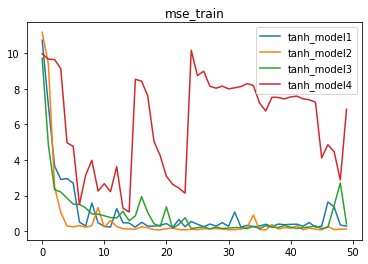

In [52]:
# 训练误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

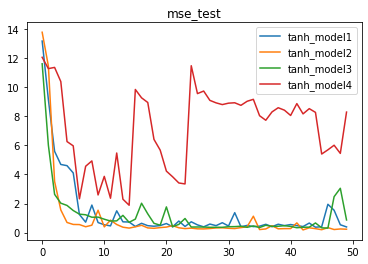

In [53]:
# 测试误差
for i,name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i],label=name)
plt.legend(loc=1)
plt.title('mse_test')

- tanh激活函数叠加效果中规中矩，收敛速度基本一致，收敛过程稳定性较好，模型效果较为可信
- 叠加过程出现了剧烈波动，甚至出现了跳跃点（该问题称为迭代不平稳，需要优化迭代过程来解决）

#### 模型参数和梯度提取方法

- `.parameters()`方法，观察模型所有参数
- `.module`方法，观察构成该模型的每个线性层的参数

##### `.parameters()`方法

In [54]:
pl = list(sigmoid_model3.parameters())
pl # 每一层参数、截距

[Parameter containing:
 tensor([[-0.1066,  1.5899],
         [-1.7910,  0.0760],
         [-1.9085,  0.0160],
         [ 0.0776, -1.5167]], requires_grad=True),
 Parameter containing:
 tensor([ 3.0783,  3.0913, -3.0545,  3.0409], requires_grad=True),
 Parameter containing:
 tensor([[-1.3990,  7.0697, -6.8339, -0.4567],
         [ 3.4593, -5.0604,  4.1174,  2.9743],
         [-3.0912,  4.7438, -4.3671, -3.2314],
         [ 4.4964, -3.7808,  2.5716,  4.7656]], requires_grad=True),
 Parameter containing:
 tensor([ 1.6721, -2.3153,  1.4499, -0.9376], requires_grad=True),
 Parameter containing:
 tensor([[-7.3235,  4.0417, -3.0674,  2.7995],
         [-3.0889,  2.1489, -2.7579,  2.5542],
         [ 0.9572, -1.6916,  2.4903, -1.5887],
         [ 3.8367, -2.8987,  1.7723, -5.6809]], requires_grad=True),
 Parameter containing:
 tensor([-0.5429, -0.1822, -0.2524, -0.9009], requires_grad=True),
 Parameter containing:
 tensor([[ 12.6937,   6.0762,  -3.3118, -11.9017]], requires_grad=True),
 Parame

In [55]:
# pytorch进行计算时，会把数据转化为按列排列，列：数据、行：特征
# 因此pytorch查看的模型参数 和 手工推导的模型参数 互为转置关系

##### `.module`方法

In [56]:
ml = list(sigmoid_model2.modules())
ml

[Sigmoid_class2(
   (linear1): Linear(in_features=2, out_features=4, bias=True)
   (linear2): Linear(in_features=4, out_features=4, bias=True)
   (linear3): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=1, bias=True)]

In [57]:
# ml中除了第一个元素是自定义的类以外ml[0]，其他的都是构成模型的线性层ml[1],ml[2],ml[3]

In [59]:
list(ml[0].parameters()) # 等同于model.parameters()

[Parameter containing:
 tensor([[-4.1239,  0.2133],
         [-4.3168,  0.1961],
         [ 4.9363, -0.1545],
         [-3.0208, -0.0062]], requires_grad=True),
 Parameter containing:
 tensor([ 8.6060, -3.5319, -4.0561, -6.4848], requires_grad=True),
 Parameter containing:
 tensor([[-6.3934,  5.2081,  1.4101,  4.4166],
         [-5.5156, -2.5011,  5.0161, -1.6789],
         [ 2.3205, -2.9298, -2.5266, -5.1175],
         [-0.1088, -2.2805, -2.6470, -1.0984]], requires_grad=True),
 Parameter containing:
 tensor([-1.3302, -0.2077,  0.1179, -0.5715], requires_grad=True),
 Parameter containing:
 tensor([[14.1461,  5.8049, -3.8147, -2.2378]], requires_grad=True),
 Parameter containing:
 tensor([2.9957], requires_grad=True)]

In [60]:
list(ml[1].parameters()) # 各个线性层的参数 ml[1],ml[2],ml[3]

[Parameter containing:
 tensor([[-4.1239,  0.2133],
         [-4.3168,  0.1961],
         [ 4.9363, -0.1545],
         [-3.0208, -0.0062]], requires_grad=True),
 Parameter containing:
 tensor([ 8.6060, -3.5319, -4.0561, -6.4848], requires_grad=True)]

In [61]:
ml[1].weight, ml[1].bias

(Parameter containing:
 tensor([[-4.1239,  0.2133],
         [-4.3168,  0.1961],
         [ 4.9363, -0.1545],
         [-3.0208, -0.0062]], requires_grad=True),
 Parameter containing:
 tensor([ 8.6060, -3.5319, -4.0561, -6.4848], requires_grad=True))

In [62]:
# 提取每一个线性层的 weight
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[-0.1066,  1.5899],
        [-1.7910,  0.0760],
        [-1.9085,  0.0160],
        [ 0.0776, -1.5167]], requires_grad=True)
Parameter containing:
tensor([[-1.3990,  7.0697, -6.8339, -0.4567],
        [ 3.4593, -5.0604,  4.1174,  2.9743],
        [-3.0912,  4.7438, -4.3671, -3.2314],
        [ 4.4964, -3.7808,  2.5716,  4.7656]], requires_grad=True)
Parameter containing:
tensor([[-7.3235,  4.0417, -3.0674,  2.7995],
        [-3.0889,  2.1489, -2.7579,  2.5542],
        [ 0.9572, -1.6916,  2.4903, -1.5887],
        [ 3.8367, -2.8987,  1.7723, -5.6809]], requires_grad=True)
Parameter containing:
tensor([[ 12.6937,   6.0762,  -3.3118, -11.9017]], requires_grad=True)


### sigmoid函数叠加后的梯度消失问题观察

In [63]:
torch.manual_seed(420)

# 创建最高项为2的多项式回归数据集
features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

# 进行数据集切分与加载
train_loader,test_loader = split_loader(features,labels)

In [64]:
# 实例化模型
torch.manual_seed(420)
sigmoid_model3 = Sigmoid_class3()

In [65]:
fit(net = sigmoid_model3,
   criterion = nn.MSELoss(),
   optimizer = optim.SGD(sigmoid_model3.parameters(),lr=0.03),
   batchData = train_loader,
   epochs = 5,
   cla = False)

In [66]:
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[ 0.4373, -0.4245],
        [ 0.7056, -0.5486],
        [-0.2127, -0.4852],
        [ 0.5289,  0.2734]], requires_grad=True)
Parameter containing:
tensor([[-0.2630,  0.3532, -0.2101, -0.3368],
        [-0.1429, -0.4673, -0.2501, -0.2617],
        [ 0.1525,  0.4754,  0.0487, -0.2464],
        [ 0.1905, -0.2353, -0.2352, -0.1144]], requires_grad=True)
Parameter containing:
tensor([[ 0.2611, -0.4749, -0.4613, -0.1173],
        [-0.0566,  0.2591, -0.5354,  0.1386],
        [-0.4262,  0.0491,  0.3438,  0.0642],
        [ 0.1865,  0.2986,  0.5505, -0.2915]], requires_grad=True)
Parameter containing:
tensor([[ 0.0477, -0.0260,  0.6937,  0.8508]], requires_grad=True)


In [67]:
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

tensor([[ 2.1808e-04, -6.1006e-04],
        [-4.7424e-06, -1.8825e-03],
        [ 5.0653e-04, -5.8459e-04],
        [-2.1380e-03,  2.5715e-03]])
tensor([[-0.0012, -0.0013, -0.0007, -0.0003],
        [ 0.0028,  0.0030,  0.0015,  0.0006],
        [ 0.0070,  0.0075,  0.0038,  0.0014],
        [-0.0024, -0.0026, -0.0014, -0.0006]])
tensor([[ 1.8961e-04, -1.5584e-04,  6.4209e-04,  1.6556e-04],
        [-1.0389e-04,  8.5139e-05, -3.5156e-04, -9.0795e-05],
        [ 2.5782e-03, -2.4119e-03,  8.9966e-03,  2.1951e-03],
        [ 3.3940e-03, -2.9424e-03,  1.1632e-02,  2.9350e-03]])
tensor([[0.0200, 0.0185, 0.0296, 0.0250]])


In [68]:
# 绘制小提琴图对各层梯度进行观察

In [69]:
import seaborn as sns

In [70]:
vp =[] # 创建空列表用于存储每一层参数的难度

for i,m in enumerate(sigmoid_model3.modules()):
    if isinstance(m, nn.Linear):
        vp_x = m.weight.grad.detach().reshape(-1,1).numpy() # 每一层参数梯度
        vp_y = np.full_like(vp_x, i) # 对层进行标记
        vp_a = np.concatenate((vp_x, vp_y), 1)
        vp.append(vp_a)

In [71]:
vp

[array([[ 2.1808071e-04,  1.0000000e+00],
        [-6.1006157e-04,  1.0000000e+00],
        [-4.7424342e-06,  1.0000000e+00],
        [-1.8825053e-03,  1.0000000e+00],
        [ 5.0652976e-04,  1.0000000e+00],
        [-5.8459240e-04,  1.0000000e+00],
        [-2.1380039e-03,  1.0000000e+00],
        [ 2.5715118e-03,  1.0000000e+00]], dtype=float32),
 array([[-1.1987886e-03,  2.0000000e+00],
        [-1.2710983e-03,  2.0000000e+00],
        [-6.8579643e-04,  2.0000000e+00],
        [-2.9897713e-04,  2.0000000e+00],
        [ 2.7674716e-03,  2.0000000e+00],
        [ 2.9552621e-03,  2.0000000e+00],
        [ 1.5215663e-03,  2.0000000e+00],
        [ 6.3543289e-04,  2.0000000e+00],
        [ 6.9975294e-03,  2.0000000e+00],
        [ 7.4815713e-03,  2.0000000e+00],
        [ 3.8293104e-03,  2.0000000e+00],
        [ 1.4357853e-03,  2.0000000e+00],
        [-2.4192042e-03,  2.0000000e+00],
        [-2.5585443e-03,  2.0000000e+00],
        [-1.4026746e-03,  2.0000000e+00],
        [-6.13617

In [72]:
vp_r = np.concatenate((vp), 0) # 拼接行
vp_r

array([[ 2.1808071e-04,  1.0000000e+00],
       [-6.1006157e-04,  1.0000000e+00],
       [-4.7424342e-06,  1.0000000e+00],
       [-1.8825053e-03,  1.0000000e+00],
       [ 5.0652976e-04,  1.0000000e+00],
       [-5.8459240e-04,  1.0000000e+00],
       [-2.1380039e-03,  1.0000000e+00],
       [ 2.5715118e-03,  1.0000000e+00],
       [-1.1987886e-03,  2.0000000e+00],
       [-1.2710983e-03,  2.0000000e+00],
       [-6.8579643e-04,  2.0000000e+00],
       [-2.9897713e-04,  2.0000000e+00],
       [ 2.7674716e-03,  2.0000000e+00],
       [ 2.9552621e-03,  2.0000000e+00],
       [ 1.5215663e-03,  2.0000000e+00],
       [ 6.3543289e-04,  2.0000000e+00],
       [ 6.9975294e-03,  2.0000000e+00],
       [ 7.4815713e-03,  2.0000000e+00],
       [ 3.8293104e-03,  2.0000000e+00],
       [ 1.4357853e-03,  2.0000000e+00],
       [-2.4192042e-03,  2.0000000e+00],
       [-2.5585443e-03,  2.0000000e+00],
       [-1.4026746e-03,  2.0000000e+00],
       [-6.1361771e-04,  2.0000000e+00],
       [ 1.89605

In [73]:
vp_r[:,0] # 每一层梯度

array([ 2.1808071e-04, -6.1006157e-04, -4.7424342e-06, -1.8825053e-03,
        5.0652976e-04, -5.8459240e-04, -2.1380039e-03,  2.5715118e-03,
       -1.1987886e-03, -1.2710983e-03, -6.8579643e-04, -2.9897713e-04,
        2.7674716e-03,  2.9552621e-03,  1.5215663e-03,  6.3543289e-04,
        6.9975294e-03,  7.4815713e-03,  3.8293104e-03,  1.4357853e-03,
       -2.4192042e-03, -2.5585443e-03, -1.4026746e-03, -6.1361771e-04,
        1.8960562e-04, -1.5583656e-04,  6.4209232e-04,  1.6556379e-04,
       -1.0388675e-04,  8.5138963e-05, -3.5156394e-04, -9.0795285e-05,
        2.5782366e-03, -2.4119313e-03,  8.9966394e-03,  2.1950849e-03,
        3.3940074e-03, -2.9423765e-03,  1.1631826e-02,  2.9349902e-03,
        1.9976340e-02,  1.8451205e-02,  2.9556660e-02,  2.4957530e-02],
      dtype=float32)

[Text(0.5, 0, 'num_hidden'), Text(0.5, 1.0, 'Gradients')]

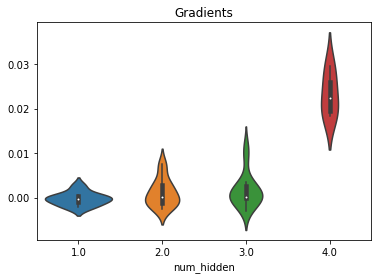

In [74]:
ax = sns.violinplot(y = vp_r[:,0],x = vp_r[:,1])
ax.set(xlabel='num_hidden',title='Gradients')

[Text(0.5, 0, 'num_hidden'), Text(0.5, 1.0, 'weights')]

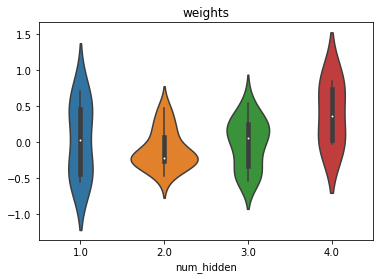

In [75]:
vp =[] # 创建空列表用于存储每一层参数的难度

for i,m in enumerate(sigmoid_model3.modules()):
    if isinstance(m, nn.Linear):
        vp_x = m.weight.detach().reshape(-1,1).numpy() # 每一层参数weight
        vp_y = np.full_like(vp_x, i) # 对层进行标记
        vp_a = np.concatenate((vp_x, vp_y), 1)
        vp.append(vp_a)

vp_r = np.concatenate((vp), 0) # 拼接行

ax = sns.violinplot(y = vp_r[:,0],x = vp_r[:,1])
ax.set(xlabel='num_hidden',title='weights')

In [94]:
def weights_vp(model, att="grad"):
    """观察各层参数取值和梯度的小提琴图绘图函数
    
    param model: 观察对象（模型）
    param att: 选择参数梯度（grad）还是参数取值（weights）进行观察
    return : 对应att的小提琴图
    
    """
    
    vp =[] # 创建空列表用于存储每一层参数的难度

    for i,m in enumerate(model.modules()):
        if isinstance(m, nn.Linear):
            if att == "grad":
                vp_x = m.weight.grad.detach().reshape(-1,1).numpy() # 每一层参数梯度
            else:
                vp_x = m.weight.detach().reshape(-1,1).numpy() # 每一层参数权重
            
            vp_y = np.full_like(vp_x, i) # 对层进行标记
            vp_a = np.concatenate((vp_x, vp_y), 1)
            vp.append(vp_a)

    vp_r = np.concatenate((vp), 0) # 拼接行

    ax = sns.violinplot(y = vp_r[:,0],x = vp_r[:,1])
    ax.set(xlabel='num_hidden',title=att)

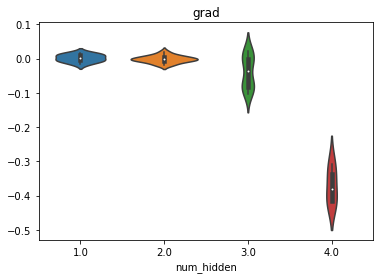

In [95]:
weights_vp(sigmoid_model3, att="grad")

In [96]:
fit(net = sigmoid_model3,
   criterion = nn.MSELoss(),
   optimizer = optim.SGD(sigmoid_model3.parameters(),lr=0.03),
   batchData = train_loader,
   epochs = 20,
   cla = False)

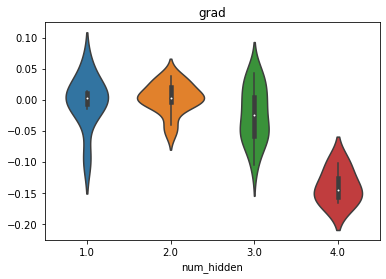

In [97]:
weights_vp(sigmoid_model3, att="grad")

### tanh函数叠加问题观察

In [98]:
# 绘制tanh函数的函数图像 和 导函数图像
X = torch.arange(-5,5,0.1)
X.requires_grad = True
tanh_y = torch.tanh(X)

# 反向传播
tanh_y.sum().backward()

Text(0.5, 1.0, 'tanh Function')

Text(0.5, 1.0, 'tanh Derivative function')

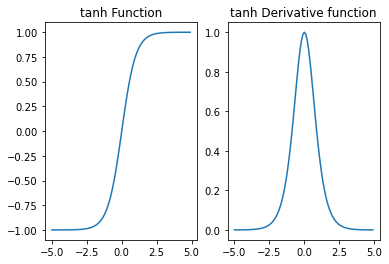

In [99]:
# tanh 函数图像
plt.subplot(121)
plt.plot(X.detach(), tanh_y.detach())
plt.title("tanh Function")

# tanh 导函数图像
plt.subplot(122)
plt.plot(X.detach(), X.grad.detach())
plt.title("tanh Derivative function")

In [100]:
torch.manual_seed(420)
# 实例化模型
tanh_model4 = Tanh_class4()

# 观察各层参数
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[ 0.4318, -0.4256],
        [ 0.6730, -0.5617],
        [-0.2157, -0.4873],
        [ 0.5453,  0.2653]], requires_grad=True)
Parameter containing:
tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
        [-0.1542, -0.4883, -0.2428, -0.2728],
        [ 0.1076,  0.4066,  0.0540, -0.2914],
        [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True)
Parameter containing:
tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
        [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01],
        [-4.2916e-01,  8.0655e-02,  3.3044e-01,  6.8971e-02],
        [ 1.5964e-01,  3.1789e-01,  4.9465e-01, -3.1377e-01]],
       requires_grad=True)
Parameter containing:
tensor([[-0.3468, -0.4897,  0.2213,  0.4947],
        [-0.4843,  0.3998, -0.4678, -0.0610],
        [ 0.4057, -0.0786,  0.0555,  0.3645],
        [-0.4194,  0.1265, -0.2440,  0.4589]], requires_grad=True)
Parameter containing:
tensor([[-0.2952,  0.1712, -0.3926,  0.2928]], requires_grad=True)


In [101]:
# 模型训练
train_l,test_l = model_train_test(tanh_model4,
                                 train_loader,
                                 test_loader,
                                 num_epochs=5,
                                 criterion = nn.MSELoss(),
                                 optimizer = optim.SGD,
                                 lr = 0.03,
                                 cla = False,
                                 eva = mse_cal)

In [102]:
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[ 1.7080,  0.0037],
        [ 2.0466, -1.5288],
        [-1.4761,  0.6819],
        [ 1.0288,  0.8090]], requires_grad=True)
Parameter containing:
tensor([[-1.4932,  0.0494, -0.6812, -1.0554],
        [ 0.2818, -0.5120, -0.6239,  1.1164],
        [ 0.9311,  1.3955, -0.4082, -0.4927],
        [ 0.0171, -0.3641, -0.9767,  1.0619]], requires_grad=True)
Parameter containing:
tensor([[ 1.5814, -0.3326, -1.5687, -0.1156],
        [-0.3200,  1.0066, -1.5089,  0.7275],
        [-0.2816,  0.6997,  0.6798,  0.9843],
        [ 0.8134,  0.1038,  0.9329, -0.4881]], requires_grad=True)
Parameter containing:
tensor([[-0.6423, -1.1058, -0.1102,  0.8383],
        [-1.5105,  0.9285, -1.7456, -0.4242],
        [ 1.5275, -0.2635,  0.1828,  0.2694],
        [-1.0594,  1.2584, -1.0363,  0.5127]], requires_grad=True)
Parameter containing:
tensor([[-2.7933,  2.0887, -1.3238,  1.6914]], requires_grad=True)


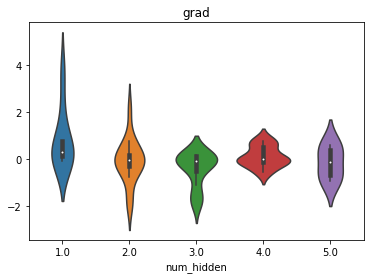

In [103]:
weights_vp(tanh_model4, att="grad")

In [104]:
# tanh 激活函数本身良好的特性（能够输出Zero-Centered Data）,一般不会出现梯度消失情况
# 但梯度爆炸同样会极大影响模型训练过程的稳定性，这种现象不会因为模型迭代次数增加而消失

In [105]:
# 增加模型迭代次数

In [106]:
torch.manual_seed(420)

# 实例化模型
tanh_model4 = Tanh_class4()

train_l,test_l = model_train_test(tanh_model4,
                                 train_loader,
                                 test_loader,
                                 num_epochs = 20,
                                 criterion = nn.MSELoss(),
                                 optimizer = optim.SGD,
                                 lr = 0.03,
                                 cla = False,
                                 eva = mse_cal)

In [107]:
# 观察各层梯度
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

tensor([[-0.0002, -0.0003],
        [ 0.0137,  0.0139],
        [ 0.0002, -0.0006],
        [ 0.0046,  0.0043]])
tensor([[-0.0143,  0.0116,  0.0094,  0.0136],
        [-0.0073,  0.0073, -0.0071,  0.0064],
        [ 0.0582,  0.0102,  0.0506, -0.0512],
        [-0.0010,  0.0011,  0.0011, -0.0004]])
tensor([[-0.0029, -0.0029, -0.0029,  0.0012],
        [-0.1807, -0.2042, -0.2031,  0.2066],
        [-0.0231, -0.0235,  0.0146, -0.0249],
        [ 0.0027,  0.0006,  0.0004,  0.0042]])
tensor([[-3.1710e-03, -3.1729e-03, -3.0833e-03, -1.9147e-03],
        [ 3.4211e-04,  3.3418e-04,  3.4175e-04, -3.3709e-04],
        [-8.3869e-02, -8.3763e-02, -7.9233e-02, -4.5105e-02],
        [ 1.4821e+00,  1.4482e+00,  1.4819e+00, -1.4207e+00]])
tensor([[-2.7434, -2.7439,  2.7003,  1.5683]])


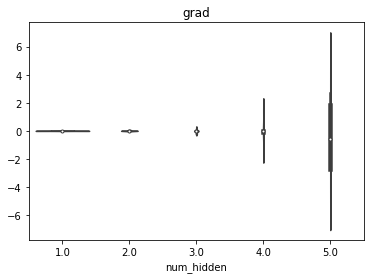

In [108]:
weights_vp(tanh_model4, att="grad")

### 梯度不平稳的解决方案（优化方法）
- 参数初始化方法
- 输入数据的的归一化方法
- 衍生激活函数使用方法
- 学习率调度方法
- 梯度下降优化方法

解决方案的基本理论 - Xavier Glorot在2010提出的 Glorot 条件

1. Zero-centered Data

In [110]:
# sigmoid/tanh（激活函数）的导函数在0值时最大，两边可能会造成梯度消失/爆炸
# （X，w）数据零均值，在每层输入输出都可能为零均值，则避免梯度不平稳
# 参数初始值全为零，迭代结束后参数每一列相同，同步变化
# 要节制统计工具生成均值是0的随机数，也就是0均值的均匀分布或者是0均值的高斯分布
# 该随机数的方差如何确定

2. Glorot 条件和 Xavier 方法

In [111]:
# Glorot 条件：正向传播时数据方差保持一致，反向传播时参数梯度方差保持一致（数据流经线性层，输入和输出时数据的方差相同）
# 满足该条件的模型能够进行平稳有效的训练
# 为了满足该条件而创建的模型初始化参数值设计方法，被称为Xavier方法
# Xavier方法中核心解决的问题就是为了创建Zero-Centered的初始化参数时参数的方差

3. 模型初始参数取值的影响

### Dead ReLU Problem与学习率优化
ReLU激活函数的叠加不会出现梯度消失或者梯度爆炸，但ReLU激活函数中使得部分数值归0的特性，却会导致神经元活性失效问题
#### 一、Dead ReLU Problem成因分析
1. Dead ReLU Problem 直接表现

In [125]:
torch.manual_seed(420)

# 创建最高项为2 的多项式回归数据集
features, labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

# 进行数据集切分加载
train_loader, test_loader = split_loader(features, labels)


torch.manual_seed(420)

# 实例化模型
relu_model3 = ReLU_class3(bias=False) # 为了更方便的观察神经元活性失效问题，创建不带截距项的模型

# 核心参数
num_epochs = 20
lr = 0.03

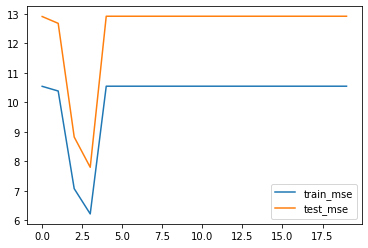

In [126]:
# 观察模型训练结果

# 训练模型
train_l,test_l = model_train_test(relu_model3,
                                 train_loader,
                                 test_loader,
                                 num_epochs = num_epochs,
                                 criterion = nn.MSELoss(),
                                 optimizer = optim.SGD,
                                 lr = 0.03,
                                 cla = False,
                                 eva = mse_cal)

# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l, label="train_mse")
plt.plot(list(range(num_epochs)), test_l, label="test_mse")
plt.legend(loc =4)

In [127]:
relu_model3(features)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [128]:
# 模型在多轮迭代后，训练误差和测试误差都在各自取值的高位收敛了，也就是模型不随迭代测试增加而递减
# 此时模型对所有数据的输出结果都是0

2. Dead ReLU Problem 基本判别
> 神经元活性失效问题 和 ReLU 激活函数本身特性有关

Text(0.5, 1.0, 'ReLU Function')

Text(0.5, 1.0, 'ReLU Derivative function')

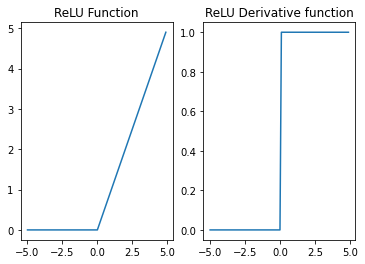

In [121]:
# 绘制tanh函数的函数图像 和 导函数图像
X = torch.arange(-5,5,0.1)
X.requires_grad = True
relu_y = torch.relu(X)

# 反向传播
relu_y.sum().backward()

# tanh 函数图像
plt.subplot(121)
plt.plot(X.detach(), relu_y.detach())
plt.title("ReLU Function")

# tanh 导函数图像
plt.subplot(122)
plt.plot(X.detach(), X.grad.detach())
plt.title("ReLU Derivative function")

In [129]:
# 在正向传播中，可能由于前面几层有大量的负值，relu函数输出结果为0
# relu函数为 0 其导函数也为 0 ，导致其反向传播结果，也就是各层的梯度，也都是 0

In [131]:
# in_features=2,hidden=2,out_features=1

# 设w1为第一层传播的权重，w2为第二层传播的权重
# w1的第一列对应隐藏层第一个神经元的权重，w1的第二列对应连接隐藏层第二个神经元的权重
# f为输入的特征张量，并且只有一条数据

w1 = torch.tensor([[0.,0],[-1,-2]],requires_grad=True)
w1

tensor([[ 0.,  0.],
        [-1., -2.]], requires_grad=True)

In [132]:
w2 = torch.tensor([1.,-1]).reshape(-1,1)
w2.requires_grad = True
w2

tensor([[ 1.],
        [-1.]], requires_grad=True)

In [133]:
f = torch.tensor([[1,2.]])
f

tensor([[1., 2.]])

In [134]:
# 第一次向前传播
# f * w -> 隐藏层的输入
f2 = torch.mm(f,w1)
f2

tensor([[-2., -4.]], grad_fn=<MmBackward>)

In [135]:
# 激活函数处理 隐藏层输出
f3 = torch.relu(f2)
f3

tensor([[0., 0.]], grad_fn=<ReluBackward0>)

In [136]:
# 输出结果
out = torch.mm(f3,w2)
out

tensor([[0.]], grad_fn=<MmBackward>)

In [137]:
# l为 f 的真实标签，则损失函数和反向传播过程如下

In [138]:
l = torch.tensor([[3.]]) # 假设的真实标签3,损失为3
l

tensor([[3.]])

In [139]:
loss = F.mse_loss(out,l)
loss

tensor(9., grad_fn=<MseLossBackward>)

In [140]:
loss.backward()

In [141]:
# 此时w1、w2的梯度如下

In [142]:
w1.grad
w2.grad

tensor([[0., 0.],
        [0., 0.]])

tensor([[0.],
        [0.]])

- 模型输出结果为 0 时，反向传播后各层的梯度也为 0 ，此时参数无法通过迭代更新
- 如果某种参数情况下，完整训练集输入模型后，输出结果为0，则在小批量梯度下降的情况下，每次迭代选取部分数据，仍无法改变输出结果是0的情况，此时参数无法得到更新，从而梯度为 0 ，陷入死循环，模型失效，激活函数失去活性，出现 Dead ReLU Problem

In [143]:
train_loader.dataset # 已封装好但是未加载的数据集

In [144]:
train_loader.dataset[:] # 返回所有已经加载好的数据集的特征和标签

(tensor([[-1.4463, -0.6221],
         [-0.4742, -0.2939],
         [ 1.9870,  0.1949],
         ...,
         [-1.6366, -2.1399],
         [-1.8178, -1.4618],
         [ 0.2646,  2.3555]]),
 tensor([[ 3.7810e+00],
         [ 3.5272e-01],
         [ 7.8729e+00],
         [ 1.2649e+00],
         [ 2.2170e+00],
         [ 1.3097e-01],
         [ 2.3854e+00],
         [ 7.7007e+00],
         [ 1.6460e+00],
         [ 1.1185e-01],
         [ 2.8626e+00],
         [-7.3962e-01],
         [ 2.3484e+00],
         [ 8.2029e-01],
         [-1.5293e+00],
         [-2.9374e+00],
         [-5.4132e-01],
         [-5.8651e-02],
         [ 1.8011e+00],
         [ 1.9740e-01],
         [-1.3216e+00],
         [ 2.0199e-02],
         [ 4.2803e+00],
         [ 2.4174e-01],
         [-2.9099e+00],
         [ 1.9353e+00],
         [ 3.1637e-01],
         [ 1.1675e-01],
         [ 2.2624e+00],
         [ 2.7396e+00],
         [ 4.2211e+00],
         [-1.6209e+00],
         [ 2.9930e+00],
         [ 5.6081e

In [145]:
train_loader.dataset[:][0] # 返回训练数据的特征

tensor([[-1.4463, -0.6221],
        [-0.4742, -0.2939],
        [ 1.9870,  0.1949],
        ...,
        [-1.6366, -2.1399],
        [-1.8178, -1.4618],
        [ 0.2646,  2.3555]])

In [146]:
relu_model3(train_loader.dataset[:][0]) # 特征数据代入模型得到输出结果，全为0

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [147]:
(relu_model3(train_loader.dataset[:][0]) == 0).sum()

tensor(700)

> 如果模型有偏差，出现 Dead ReLU Problem 的时候，模型输出结果恒为 bias 的取值

#### 二、通过调整学习率缓解 Dead ReLU Problem

In [149]:
# 对于 ReLU 激活函数来说，参数“稍有不慎”就容易落入输出全为 0 的陷阱，因此训练过程需要更加保守，采用更小的的学习率逐步迭代。
# 学习率减少就必须增加迭代次数，但由于 ReLU 激活函数计算过程相对简单，增加迭代次数并不会显著增加计算量

Text(0.5, 1.0, 'lr=0.03')

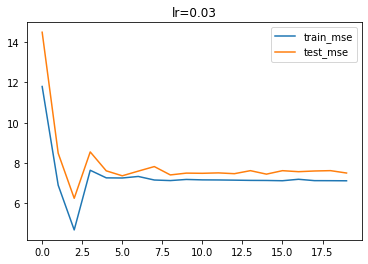

In [153]:
torch.manual_seed(420)

# 核心参数
num_epochs = 20
lr = 0.03

# 实例化模型
relu_model3 = ReLU_class3()

# 模型训练
train_l, test_l = model_train_test(relu_model3,
                                   train_loader,
                                   test_loader,
                                   num_epochs = num_epochs,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

# 绘制图像，查看 MSE 变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.title('lr=0.03')
plt.legend(loc = 1)

In [154]:
# bias=True,但仍然结果平稳且在mse高位上收敛，模型无效

Text(0.5, 1.0, 'lr=0.001')

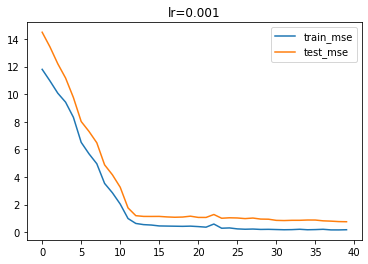

In [156]:
torch.manual_seed(420)

# 核心参数
num_epochs = 40
lr = 0.001

# 实例化模型
relu_model3 = ReLU_class3()

# 模型训练
train_l, test_l = model_train_test(relu_model3,
                                   train_loader,
                                   test_loader,
                                   num_epochs = num_epochs,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

# 绘制图像，查看 MSE 变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.title('lr=0.001')
plt.legend(loc = 1)

In [157]:
# 通过降低学习率，问题得到很好的解决

#### 三、 ReLU 激活函数特性理解

#### 四、 nn.Sequential 快速建模方法 及 nn.init 模型参数自定义方法
##### 1. nn.Sequential 快速建模方法

In [158]:
torch.manual_seed(25)

# 构建 LR_ReLU_test 模型
# 参数： 每一层 神经元连接方法 和 激活函数
# 输出： 已经实例化后的模型
relu_test = nn.Sequential(nn.Linear(2,2,bias=False),nn.ReLU(),nn.Linear(2,1,bias=False))

In [159]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0.3561, -0.4343],
         [-0.6182,  0.5823]], requires_grad=True),
 Parameter containing:
 tensor([[-0.1658, -0.2843]], requires_grad=True)]

In [161]:
isinstance(relu_test,nn.Sequential) # 实例化后的模型 是 nn.Sequential 的实例

isinstance(relu_model3,ReLU_class3) # 之前的模型 是创建的模型类的实例

True

True

In [163]:
# 向前传播过程
f = torch.tensor([[1,2.]],requires_grad=True)
f
relu_test.forward(f)

tensor([[1., 2.]], requires_grad=True)

tensor([[-0.1553]], grad_fn=<MmBackward>)

##### 2. 模型参数自定义方法 
- 通过修改可微张量方法修改参数
    - `.data`手动
    lesson12的三种方法
- `nn.init`的方法
    - uniform_
    - normal_
    - constant_
- 优化算法的方法
    - Xavier方法
    - kaiming方法

> 对于模型参数来说，parameters返回结果是个生成器（generator），通过 list 转化后会生成一个由可微张量构成的 list

In [165]:
relu_test.parameters()

<generator object Module.parameters at 0x7f946ae25890>

In [167]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0.3561, -0.4343],
         [-0.6182,  0.5823]], requires_grad=True),
 Parameter containing:
 tensor([[-0.1658, -0.2843]], requires_grad=True)]

In [168]:
list(relu_test.parameters())[0]

Parameter containing:
tensor([[ 0.3561, -0.4343],
        [-0.6182,  0.5823]], requires_grad=True)

In [176]:
w1 = torch.tensor([[0.,0], [-1,-2]])
w2 = torch.tensor([1.,-1]).reshape(-1,1)
w1,w1.t()
w2,w2.t()

(tensor([[ 0.,  0.],
         [-1., -2.]]),
 tensor([[ 0., -1.],
         [ 0., -2.]]))

(tensor([[ 1.],
         [-1.]]),
 tensor([[ 1., -1.]]))

In [ ]:
# 通过.data方法修改

In [170]:
list(relu_test.parameters())[0].data = w1.t() # tensor.t() 张量的转置

In [171]:
list(relu_test.parameters())[1].data = w2.t()

In [172]:
# 查看修改结果
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0., -1.],
         [ 0., -2.]], requires_grad=True),
 Parameter containing:
 tensor([[ 1., -1.]], requires_grad=True)]

In [ ]:
# 梯度值替换结束后，执行向前传播

In [173]:
f = torch.tensor([[1,2.]])
f

tensor([[1., 2.]])

In [177]:
# 模型输出结果
out = relu_test.forward(f)
out

tensor([[0.]], grad_fn=<MmBackward>)

In [178]:
# 真实标签
l = torch.tensor([[3.]])
l

tensor([[3.]])

In [184]:
# 计算损失函数
loss = F.mse_loss(out,l)
loss

tensor(9., grad_fn=<MseLossBackward>)

In [185]:
#  反向传播
loss.backward()

In [186]:
# 查看模型参数梯度

In [187]:
list(relu_test.parameters())[0].grad

tensor([[0., 0.],
        [0., 0.]])

In [188]:
list(relu_test.parameters())[1].grad

tensor([[0., 0.]])

> 使用 init 方法创建满足某种分布的参数

In [189]:
# 重新设置初始化模型参数取值

torch.manual_seed(25)

# 构建上述 LR_ReLU_test 模型
relu_test = nn.Sequential(nn.Linear(2,2,bias=False),nn.ReLU(),nn.Linear(2,1,bias=False))

In [190]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0.3561, -0.4343],
         [-0.6182,  0.5823]], requires_grad=True),
 Parameter containing:
 tensor([[-0.1658, -0.2843]], requires_grad=True)]

**（1）. `nn.init.uniform_`方法，新生成的参数服从均匀分布(uniform即将被遗弃)**

In [191]:
nn.init.uniform_(list(relu_test.parameters())[0], 0, 1) # 设置参数值为均匀分布在0-1区间内的随机数

Parameter containing:
tensor([[0.5933, 0.2911],
        [0.2416, 0.5582]], requires_grad=True)

**（2）. `nn.init.normal_`方法，新生成的参数服从正态分布**

In [192]:
nn.init.normal_(list(relu_test.parameters())[0], 0, 1) # 服从均值为0，标准差为1的正态分布

Parameter containing:
tensor([[-0.3812,  2.2157],
        [ 1.0827,  1.5799]], requires_grad=True)

**（3）. `nn.init.constant_`方法，新生成的参数为某一常数**

In [193]:
nn.init.constant_(list(relu_test.parameters())[0], 1) # 参数全为1

Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

> 使用Xavier 和 kaiming(HE)方法初始化参数

In [194]:
# 使用 torch.nn.init.xavier_uniform_ 实现 Xavier均匀分布的参数创建

In [195]:
nn.init.xavier_uniform_?

Signature: nn.init.xavier_uniform_(tensor, gain=1.0)
Docstring:
Fills the input `Tensor` with values according to the method
described in `Understanding the difficulty of training deep feedforward
neural networks` - Glorot, X. & Bengio, Y. (2010), using a uniform
distribution. The resulting tensor will have values sampled from
:math:`\mathcal{U}(-a, a)` where

.. math::
    a = \text{gain} \times \sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}

Also known as Glorot initialization.

Args:
    tensor: an n-dimensional `torch.Tensor`
    gain: an optional scaling factor

Examples:
    >>> w = torch.empty(3, 5)
    >>> nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))
File:      ~/anaconda3/lib/python3.8/site-packages/torch/nn/init.py
Type:      function


$$a = \text{gain} \times \sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}$$

In [197]:
# gain为增益系数，用于手动调整均匀分布的边界

In [198]:
t = torch.arange(8).reshape(2,4).float()
t

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]])

In [200]:
nn.init.xavier_uniform_(t) # 函数在原对象t基础上直接进行更改

tensor([[ 0.9451,  0.7625, -0.9887, -0.3887],
        [ 0.8768,  0.5897, -0.1202, -0.6469]])

In [201]:
t

tensor([[ 0.9451,  0.7625, -0.9887, -0.3887],
        [ 0.8768,  0.5897, -0.1202, -0.6469]])

In [202]:
# sigmoid 激活函数中的 xavier

In [203]:
# 数据准备及核心参数定义
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1], bias=False, deg=2)

train_loader,test_loader = split_loader(features, labels)

lr = 0.03
num_epochs = 20

In [205]:
# 实例化模型、调整模型初始参数

torch.manual_seed(420)

sigmoid_model3 = Sigmoid_class3() # 保留原参数
sigmoid_model3_init = Sigmoid_class3() # 使用Xavier初始化参数

# 修改init模型初始参数
for m in sigmoid_model3_init.modules():
    if isinstance(m,nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        
# 创建模型容器
model_l = [sigmoid_model3, sigmoid_model3_init]
name_l = ['sigmoid_model3', 'sigmoid_model3_init']

Parameter containing:
tensor([[ 0.7995, -0.2561],
        [-0.1097, -0.0529],
        [-0.8137,  0.8860],
        [-0.0984,  0.9770]], requires_grad=True)

Parameter containing:
tensor([[ 0.7130,  0.3764, -0.0196, -0.0096],
        [ 0.0199, -0.8417, -0.2067, -0.4007],
        [-0.0515,  0.1059, -0.6787,  0.6582],
        [ 0.7072,  0.5386,  0.3889,  0.1370]], requires_grad=True)

Parameter containing:
tensor([[-0.6241,  0.3488,  0.3069,  0.8371],
        [-0.8167,  0.7516,  0.6801,  0.1606],
        [ 0.2885,  0.1036, -0.0692,  0.1744],
        [ 0.5015,  0.0987, -0.0787, -0.0286]], requires_grad=True)

Parameter containing:
tensor([[-0.8437, -0.5244,  0.8917,  0.0646]], requires_grad=True)

In [207]:
# 模型训练
train_l, test_l = model_comparison(model_l = model_l,
                                   name_l = name_l,
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = 2,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

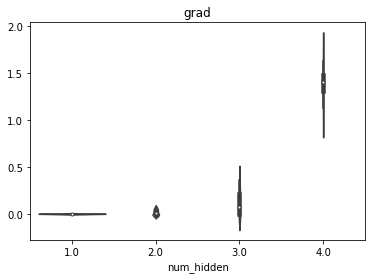

In [208]:
weights_vp(sigmoid_model3,att="grad") # 梯度消失

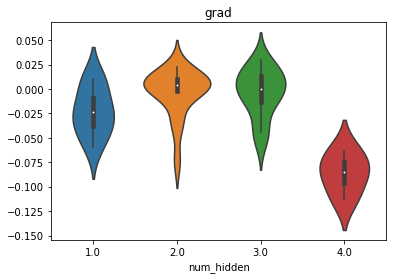

In [209]:
weights_vp(sigmoid_model3_init,att="grad") # 各层梯度饱和均匀

In [210]:
# 模型训练 - 增加迭代次数
train_l, test_l = model_comparison(model_l = model_l,
                                   name_l = name_l,
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

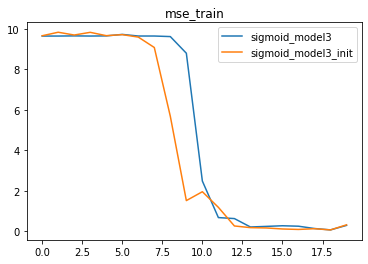

In [212]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_train')

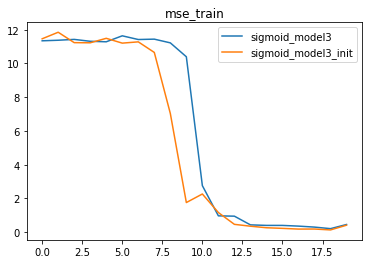

In [213]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

In [214]:
# xavier后收敛速度更快

In [215]:
# 实例化模型、调整模型初始参数

torch.manual_seed(420)

sigmoid_model4 = Sigmoid_class4() # 保留原参数
sigmoid_model4_init = Sigmoid_class4() # 使用Xavier初始化参数

# 修改init模型初始参数
for m in sigmoid_model4_init.modules():
    if isinstance(m,nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        
# 创建模型容器
model_l = [sigmoid_model4, sigmoid_model4_init]
name_l = ['sigmoid_model4', 'sigmoid_model4_init']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_l, test_l = model_comparison(model_l = model_l,
                                   name_l = name_l,
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

Parameter containing:
tensor([[-0.7702, -0.4787],
        [ 0.8140,  0.0589],
        [ 0.1050, -0.8751],
        [ 0.7307,  0.0359]], requires_grad=True)

Parameter containing:
tensor([[-0.1157, -0.8476,  0.5217, -0.1119],
        [-0.7264,  0.0346,  0.8110,  0.3522],
        [-0.3213, -0.0352,  0.3891, -0.0654],
        [-0.5320,  0.6507, -0.7491, -0.1349]], requires_grad=True)

Parameter containing:
tensor([[ 0.3895,  0.0863,  0.5659,  0.5583],
        [-0.0894,  0.3174,  0.0232,  0.2621],
        [ 0.5908,  0.6484, -0.6544,  0.4481],
        [-0.7180,  0.0903, -0.6254,  0.3962]], requires_grad=True)

Parameter containing:
tensor([[-0.6706, -0.7322, -0.7857, -0.0821],
        [-0.0844, -0.1469,  0.7504,  0.2088],
        [-0.5771,  0.6471, -0.6449,  0.2415],
        [-0.1610, -0.7965, -0.5286, -0.7978]], requires_grad=True)

Parameter containing:
tensor([[-0.9324, -0.4357, -0.3824,  0.7997]], requires_grad=True)

Text(0.5, 1.0, 'mse_train')

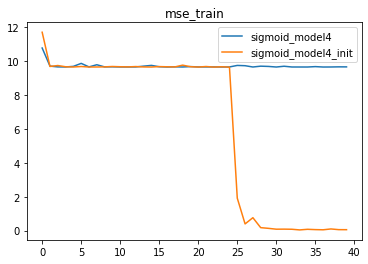

In [216]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_train')

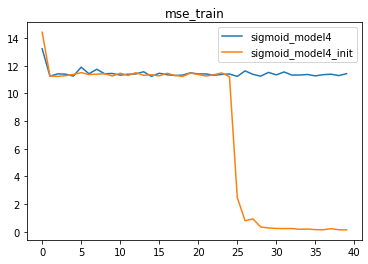

In [217]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

###### Kaming 方法（HE 初始化）

In [218]:
# 使用 torch.nn.init.xavier_normal_ 实现 Xavier高斯分布的参数创建

In [219]:
torch.nn.init.xavier_normal_?

Signature: torch.nn.init.xavier_normal_(tensor, gain=1.0)
Docstring:
Fills the input `Tensor` with values according to the method
described in `Understanding the difficulty of training deep feedforward
neural networks` - Glorot, X. & Bengio, Y. (2010), using a normal
distribution. The resulting tensor will have values sampled from
:math:`\mathcal{N}(0, \text{std}^2)` where

.. math::
    \text{std} = \text{gain} \times \sqrt{\frac{2}{\text{fan\_in} + \text{fan\_out}}}

Also known as Glorot initialization.

Args:
    tensor: an n-dimensional `torch.Tensor`
    gain: an optional scaling factor

Examples:
    >>> w = torch.empty(3, 5)
    >>> nn.init.xavier_normal_(w)
File:      ~/anaconda3/lib/python3.8/site-packages/torch/nn/init.py
Type:      function


$$ \text{std} = \text{gain} \times \sqrt{\frac{2}{\text{fan\_in} + \text{fan\_out}}}
$$

In [220]:
# 对 relu 函数的适应

> 参数初始化方法：
>    - 为了满足或者更好的满足Glorot条件
>    - 数学理论推导出参数方差
>    - 方差由扇入和扇出神经元组成

In [221]:
# 使用 torch.nn.init.kaiming_uniform_ 实现 kaiming 均匀分布的参数创建

In [222]:
nn.init.kaiming_uniform_?

Signature:
nn.init.kaiming_uniform_(
    tensor,
    a=0,
    mode='fan_in',
    nonlinearity='leaky_relu',
)
Docstring:
Fills the input `Tensor` with values according to the method
described in `Delving deep into rectifiers: Surpassing human-level
performance on ImageNet classification` - He, K. et al. (2015), using a
uniform distribution. The resulting tensor will have values sampled from
:math:`\mathcal{U}(-\text{bound}, \text{bound})` where

.. math::
    \text{bound} = \text{gain} \times \sqrt{\frac{3}{\text{fan\_mode}}}

Also known as He initialization.

Args:
    tensor: an n-dimensional `torch.Tensor`
    a: the negative slope of the rectifier used after this layer (only
        used with ``'leaky_relu'``)
    mode: either ``'fan_in'`` (default) or ``'fan_out'``. Choosing ``'fan_in'``
        preserves the magnitude of the variance of the weights in the
        forward pass. Choosing ``'fan_out'`` preserves the magnitudes in the
        backwards pass.
    nonlinearity: the non

$$\text{bound} = \text{gain} \times \sqrt{\frac{3}{\text{fan\_mode}}}$$

$$\text{bound2} =  \sqrt{\frac{6}{(1+a^2)fanin}}$$

In [223]:
# 使用 torch.nn.init.kaiming_normal_ 实现 kaiming 高斯分布的参数创建

In [224]:
torch.nn.init.kaiming_normal_?

Signature:
torch.nn.init.kaiming_normal_(
    tensor,
    a=0,
    mode='fan_in',
    nonlinearity='leaky_relu',
)
Docstring:
Fills the input `Tensor` with values according to the method
described in `Delving deep into rectifiers: Surpassing human-level
performance on ImageNet classification` - He, K. et al. (2015), using a
normal distribution. The resulting tensor will have values sampled from
:math:`\mathcal{N}(0, \text{std}^2)` where

.. math::
    \text{std} = \frac{\text{gain}}{\sqrt{\text{fan\_mode}}}

Also known as He initialization.

Args:
    tensor: an n-dimensional `torch.Tensor`
    a: the negative slope of the rectifier used after this layer (only
        used with ``'leaky_relu'``)
    mode: either ``'fan_in'`` (default) or ``'fan_out'``. Choosing ``'fan_in'``
        preserves the magnitude of the variance of the weights in the
        forward pass. Choosing ``'fan_out'`` preserves the magnitudes in the
        backwards pass.
    nonlinearity: the non-linear function (`

$$\text{std} = \frac{\text{gain}}{\sqrt{\text{fan\_mode}}}$$

$$\text{std} = \sqrt{\frac{2}{(1+a^2)fanin}}$$

In [235]:
t = torch.arange(12).reshape(2,6).float() # 张量列数 是 fanin，行数 是 fanout
t # 2 是 fanin , 6 是 fanout 个数

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [237]:
torch.manual_seed(420)
torch.nn.init.kaiming_uniform_(t) # 此时fanin个数是6

tensor([[ 0.6107, -0.6019,  0.9517, -0.7944, -0.3051, -0.6891],
        [ 0.7712,  0.3751, -0.4988, -0.7734, -0.5790, -0.1929]])

In [238]:
torch.manual_seed(420)
torch.nn.init.kaiming_uniform_(t,a=1) # 此时fanin个数是12

tensor([[ 0.4318, -0.4256,  0.6730, -0.5617, -0.2157, -0.4873],
        [ 0.5453,  0.2653, -0.3527, -0.5469, -0.4094, -0.1364]])

In [239]:
# 应该值小于根号2  ---1.41421

In [240]:
# 数据准备及核心参数定义
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1], bias=False, deg=2)

train_loader,test_loader = split_loader(features, labels)

lr = 0.001
num_epochs = 20

In [244]:
# 实例化模型、调整模型初始参数

torch.manual_seed(420)

relu_model3 = ReLU_class3() # 保留原参数
relu_model3_init = ReLU_class3() # 使用HE初始化参数

# 修改init模型初始参数
for m in relu_model3.modules():
    if isinstance(m,nn.Linear):
        nn.init.kaiming_uniform_(m.weight)
        
# 创建模型容器
model_l = [relu_model3, relu_model3]
name_l = ['relu_model3', 'relu_model3']

# 模型训练
train_l, test_l = model_comparison(model_l = model_l,
                                   name_l = name_l,
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

Parameter containing:
tensor([[ 1.3847, -0.4435],
        [-0.1899, -0.0916],
        [-1.4094,  1.5347],
        [-0.1705,  1.6922]], requires_grad=True)

Parameter containing:
tensor([[ 1.0084,  0.5323, -0.0277, -0.0135],
        [ 0.0282, -1.1904, -0.2923, -0.5667],
        [-0.0729,  0.1498, -0.9598,  0.9308],
        [ 1.0001,  0.7617,  0.5500,  0.1938]], requires_grad=True)

Parameter containing:
tensor([[-0.8826,  0.4933,  0.4340,  1.1838],
        [-1.1550,  1.0630,  0.9618,  0.2271],
        [ 0.4080,  0.1464, -0.0979,  0.2467],
        [ 0.7092,  0.1396, -0.1113, -0.0405]], requires_grad=True)

Parameter containing:
tensor([[-0.9433, -0.5863,  0.9970,  0.0722]], requires_grad=True)

Text(0.5, 1.0, 'mse_train')

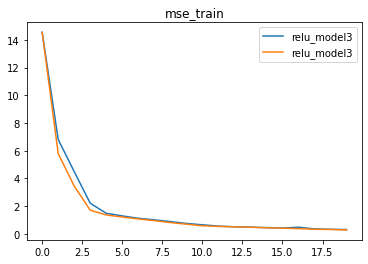

In [245]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_train')

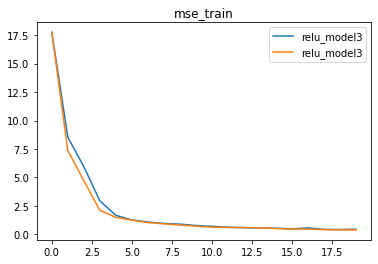

In [246]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

In [247]:
# 实例化模型、调整模型初始参数

torch.manual_seed(420)

relu_model3 = ReLU_class3() # 保留原参数
relu_model3_init = ReLU_class3() # 使用HE初始化参数

# 修改init模型初始参数
for m in relu_model3.modules():
    if isinstance(m,nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        
# 创建模型容器
model_l = [relu_model3, relu_model3]
name_l = ['relu_model3', 'relu_model3']

# 模型训练
train_l, test_l = model_comparison(model_l = model_l,
                                   name_l = name_l,
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs,
                                   criterion = nn.MSELoss(),
                                   optimizer = optim.SGD,
                                   lr = lr,
                                   cla = False,
                                   eva = mse_cal)

Parameter containing:
tensor([[ 0.4132,  1.2154],
        [-0.0425, -1.3647],
        [-0.5896,  2.1108],
        [ 0.2548,  0.1661]], requires_grad=True)

Parameter containing:
tensor([[ 0.5093, -0.2730, -0.1495,  1.4481],
        [ 1.5209,  1.1812,  0.8868, -0.7768],
        [ 0.6132, -0.8655, -0.3035, -0.1526],
        [ 0.2752, -0.5203, -0.7091, -0.5119]], requires_grad=True)

Parameter containing:
tensor([[ 0.7865, -0.0605,  0.6548, -0.9418],
        [-1.1811,  0.8337,  0.5161, -0.8076],
        [ 0.6926,  0.9038, -0.4330, -0.1764],
        [-0.4042,  0.3451, -0.5829, -0.0914]], requires_grad=True)

Parameter containing:
tensor([[-0.7091,  0.1566, -0.7193, -0.9234]], requires_grad=True)

Text(0.5, 1.0, 'mse_train')

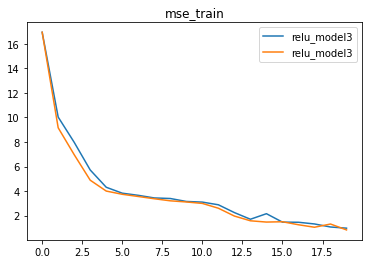

In [248]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_train')

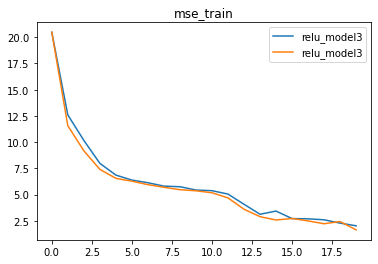

In [249]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)

plt.legend(loc=1)
plt.title('mse_train')

### 参数初始化局限

In [250]:
# 由于受到激活函数导函数本身特性的影响，仍可能在迭代过程中出现梯度不均衡的现象

> 影响梯度计算的三个核心因素
> - 参数状态值 （模型迭代的数学过程决定）
> - 激活值 （激活函数）
> - 输入的数据 （可供人工修改的选项，从Glorot条件入手）